In [1]:
import numpy as np
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt
import urllib.request

In [2]:
def Lagrange(x, xi, i):
    
    prod = 1.0
    n = len(xi)
    
    for j in range(n):
        if j != i:
            prod *= (x - xi[j])/(xi[i]-xi[j])
            
    return prod

In [3]:
def Interpolate(x, xi, yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x, xi, j)
        
    return Sum

In [4]:
def findTheta(polynomial):
    c = polynomial.coeff(x)
    return sym.atan(c)

In [5]:
def findSpeed(polynomial):
    theta = findTheta(polynomial)
    c = polynomial.coeff(x**2)
    c = c**(-1)
    c *= (-9.8/2)
    c = sym.sqrt(c)
    c *= 1/sym.cos(theta)
    
    return c

In [6]:
file = 'Data/TrayectoriaBala.txt'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'

urllib.request.urlretrieve(url, file)

('Data/TrayectoriaBala.txt', <http.client.HTTPMessage at 0x176410f51f0>)

In [7]:
Data = pd.read_csv(file)
Data

,X,Y
0,1.4,0.400795
1,3.5,0.594128
2,5.6,0.298028


In [8]:
X = np.float64(Data.X)
Y = np.float64(Data.Y)

In [9]:
x = np.linspace(X[0],X[-1],100)
f = Interpolate(x,X,Y)

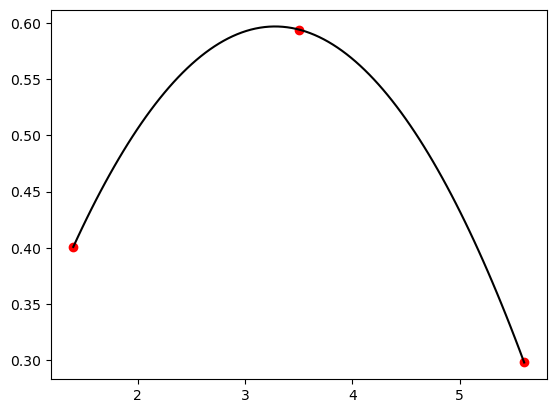

In [10]:
plt.scatter(X,Y,marker='o',color='r')
plt.plot(x,f,color='k')

In [11]:
x = sym.Symbol('x',real=True)

In [12]:
F = Interpolate(x,X,Y)
F = sym.simplify(F)
F = sym.expand(F)
F

-0.0554912422401579*x**2 + 0.363970234266202*x

In [13]:
theta_radians = findTheta(F)
theta_degrees = theta_radians*(180./np.pi)
theta_degrees

20.0000000000000

In [14]:
speed = findSpeed(F)
speed

10.0000000000000